### Data cleaning

In [1]:
# Import original dataset

import pandas as pd

df = pd.read_csv("Invistico_Airline.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [2]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# Validate and inspect data types

print("Data Types:")
print(df.dtypes)

Data Types:
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int6

In [4]:
# Find missing values

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [5]:
# Drop rows with missing values in 'Arrival Delay in Minutes'
df = df.dropna(subset=['Arrival Delay in Minutes'])

# Check missing values after dropping
print(df.isnull().sum())


satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [6]:
# Standardize text data (all object/categorical columns)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

print("After text standardization:")
print(df.head())

After text standardization:
  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  female  loyal customer   65  personal travel       eco   
1    satisfied    male  loyal customer   47  personal travel  business   
2    satisfied  female  loyal customer   15  personal travel       eco   
3    satisfied  female  loyal customer   60  personal travel       eco   
4    satisfied  female  loyal customer   70  personal travel       eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...            

In [7]:
# Binary encode 'satisfaction' column

if 'satisfaction' in df.columns:
    df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})


In [8]:

# One-hot encode all remaining categorical (object) columns

# Columns to keep as original (exclude from one-hot encoding)
exclude_categorical = ['Gender', 'Type of Travel', 'Class']

# Identify which object columns to encode
cat_cols_to_encode = [col for col in df.select_dtypes(include='object').columns if col not in exclude_categorical]

# Only apply get_dummies to selected cols (others remain unchanged)
df_encoded = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)

print("After one-hot encoding:")
print(df_encoded.head())


After one-hot encoding:
   satisfaction  Gender  Age   Type of Travel     Class  Flight Distance  \
0             1  female   65  personal travel       eco              265   
1             1    male   47  personal travel  business             2464   
2             1  female   15  personal travel       eco             2138   
3             1  female   60  personal travel       eco              623   
4             1  female   70  personal travel       eco              354   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0               0   
1             0                                  0               0   
2             0                                  0               0   
3             0                                  0               0   
4             0                                  0               0   

   Gate location  ...  Ease of Online booking  On-board service  \
0              2  ...          

In [9]:
# Convert boolean columns to 1/0 if present

to_convert = ['Customer Type_loyal customer']
for col in to_convert:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype(int)

print(df_encoded.head())

   satisfaction  Gender  Age   Type of Travel     Class  Flight Distance  \
0             1  female   65  personal travel       eco              265   
1             1    male   47  personal travel  business             2464   
2             1  female   15  personal travel       eco             2138   
3             1  female   60  personal travel       eco              623   
4             1  female   70  personal travel       eco              354   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0               0   
1             0                                  0               0   
2             0                                  0               0   
3             0                                  0               0   
4             0                                  0               0   

   Gate location  ...  Ease of Online booking  On-board service  \
0              2  ...                       3          

In [10]:
# Display columns for outliers

num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)


['satisfaction', 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Customer Type_loyal customer']


In [11]:
# Detect Outliers

outlier_indices = {}

for col in num_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df_encoded[col] < lower) | (df_encoded[col] > upper)
    outlier_indices[col] = df_encoded[mask].index

    print(f"{col}: {mask.sum()} outliers, lower={lower:.2f}, upper={upper:.2f}")


satisfaction: 0 outliers, lower=-1.50, upper=2.50
Age: 0 outliers, lower=-9.00, upper=87.00
Flight Distance: 2575 outliers, lower=-417.00, upper=4319.00
Seat comfort: 0 outliers, lower=-1.00, upper=7.00
Departure/Arrival time convenient: 0 outliers, lower=-1.00, upper=7.00
Food and drink: 0 outliers, lower=-1.00, upper=7.00
Gate location: 0 outliers, lower=-1.00, upper=7.00
Inflight wifi service: 0 outliers, lower=-1.00, upper=7.00
Inflight entertainment: 0 outliers, lower=-1.00, upper=7.00
Online support: 0 outliers, lower=0.00, upper=8.00
Ease of Online booking: 0 outliers, lower=-2.50, upper=9.50
On-board service: 13228 outliers, lower=1.50, upper=5.50
Leg room service: 0 outliers, lower=-2.50, upper=9.50
Baggage handling: 0 outliers, lower=0.00, upper=8.00
Checkin service: 15323 outliers, lower=1.50, upper=5.50
Cleanliness: 0 outliers, lower=0.00, upper=8.00
Online boarding: 0 outliers, lower=-1.00, upper=7.00
Departure Delay in Minutes: 17970 outliers, lower=-18.00, upper=30.00
Ar

Why these outliers were not removed?

Keeping the extreme values for flight distance, delays, and 1–5 service ratings because they are real experiences and opinions, not data errors. Removing them would throw away the worst delays and strongest negative or positive feedback, making it harder to see which service issues most affect satisfaction and loyalty.

In [12]:
# Save the cleaned dataframe

df_encoded.to_csv("Invistico_Airline_cleaned.csv", index=False)
print('Cleaned dataset saved as Invistico_Airline_cleaned.csv.')

Cleaned dataset saved as Invistico_Airline_cleaned.csv.


### Customer satisfaction based on all the columns and show areas of improvement

In [13]:
import pandas as pd

df = pd.read_csv("Invistico_Airline_cleaned.csv")

df.head()

,satisfaction,Gender,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_loyal customer
0,1,female,65,personal travel,eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,1
1,1,male,47,personal travel,business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,1
2,1,female,15,personal travel,eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,1
3,1,female,60,personal travel,eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,1
4,1,female,70,personal travel,eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,1


In [14]:
service_cols = [
    "Seat comfort",
    "Departure/Arrival time convenient",
    "Food and drink",
    "Gate location",
    "Inflight wifi service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Cleanliness",
    "Online boarding",
    "Inflight entertainment"
]


correlations = df[service_cols + ["satisfaction"]].corr()["satisfaction"].sort_values(ascending=False)
correlations = correlations.drop("satisfaction")
print(correlations)


Inflight entertainment               0.523364
Online boarding                      0.338118
Leg room service                     0.305115
Checkin service                      0.266089
Baggage handling                     0.260398
Cleanliness                          0.259504
Seat comfort                         0.242371
Inflight wifi service                0.227010
Food and drink                       0.120568
Gate location                       -0.012272
Departure/Arrival time convenient   -0.015624
Name: satisfaction, dtype: float64


__Biggest satisfaction boosters (top 3)__ are inflight entertainment, online & leg room service


Cleanliness, check-in service, seat comfort and wifi have medium effect on satisfaction

Food and drink, gate location and departure/arrival time convenience have no significant impact on satisfaction


Now that we know which features influence satisfaction the most (from correlation analysis), we want to answer a deeper question:

### Are customers actually satisfied with those important features, or are those features the ones causing dissatisfaction?

In [15]:
avg_by_group = df.groupby("satisfaction")[service_cols].mean()

print(avg_by_group)

              Seat comfort  Departure/Arrival time convenient  Food and drink  \
satisfaction                                                                    
0                 2.467315                           3.016517        2.660609   
1                 3.145552                           2.968582        3.010285   

              Gate location  Inflight wifi service  Leg room service  \
satisfaction                                                           
0                  3.008003               2.919922          3.052555   
1                  2.975805               3.521374          3.844587   

              Baggage handling  Checkin service  Cleanliness  Online boarding  \
satisfaction                                                                    
0                     3.364269         2.971845     3.377203         2.869653   
1                     3.969287         3.645721     3.977639         3.751799   

              Inflight entertainment  
satisfaction          

In [16]:
satisfaction_gaps = avg_by_group.loc[1] - avg_by_group.loc[0]
satisfaction_gaps = satisfaction_gaps.sort_values(ascending=False)
print(satisfaction_gaps)

Inflight entertainment               1.415222
Online boarding                      0.882146
Leg room service                     0.792032
Seat comfort                         0.678237
Checkin service                      0.673876
Baggage handling                     0.605018
Inflight wifi service                0.601452
Cleanliness                          0.600436
Food and drink                       0.349676
Gate location                       -0.032198
Departure/Arrival time convenient   -0.047936
dtype: float64


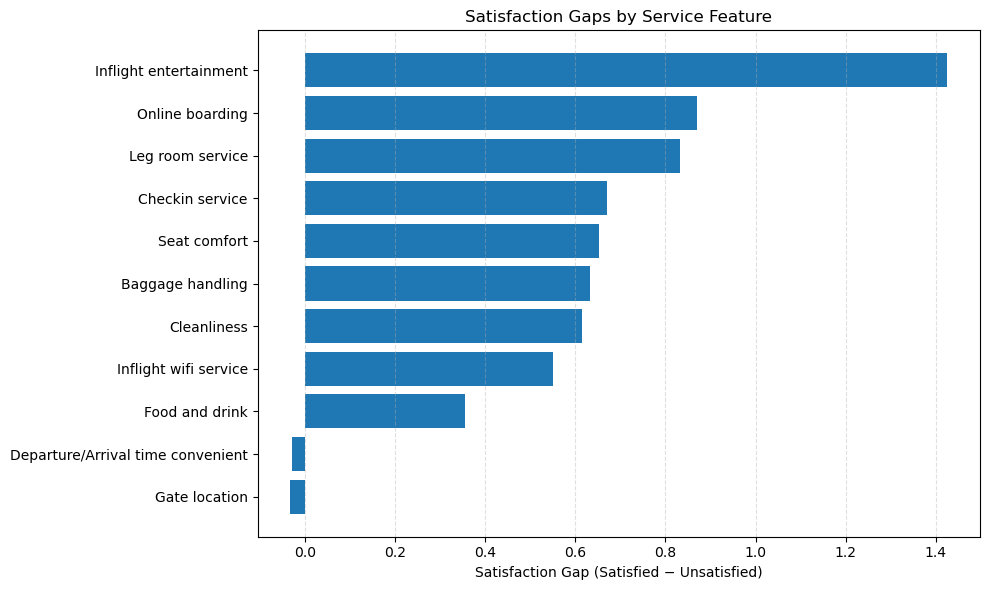

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Your satisfaction gaps
gaps = {
    "Inflight entertainment": 1.425112,
    "Online boarding": 0.870376,
    "Leg room service": 0.832564,
    "Checkin service": 0.670934,
    "Seat comfort": 0.652673,
    "Baggage handling": 0.632668,
    "Cleanliness": 0.613987,
    "Inflight wifi service": 0.550932,
    "Food and drink": 0.355087,
    "Departure/Arrival time convenient": -0.028484,
    "Gate location": -0.031734
}

# Convert to DataFrame
gaps_df = pd.DataFrame.from_dict(gaps, orient='index', columns=['Gap'])
gaps_df = gaps_df.sort_values("Gap")

# Plot
plt.figure(figsize=(10,6))
plt.barh(gaps_df.index, gaps_df["Gap"])
plt.xlabel("Satisfaction Gap (Satisfied − Unsatisfied)")
plt.title("Satisfaction Gaps by Service Feature")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Random Forest Classifier Analysis

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Define service feature columns
service_cols = [
    "Seat comfort",
    "Departure/Arrival time convenient",
    "Food and drink",
    "Gate location",
    "Inflight wifi service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Cleanliness",
    "Online boarding",
    "Inflight entertainment"
]

# Features (X) and Target (y)
X = df[service_cols]
y = df["satisfaction"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)


importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=service_cols).sort_values(ascending=False)
print(feature_importance)

Inflight entertainment               0.313825
Seat comfort                         0.174988
Leg room service                     0.076692
Online boarding                      0.072712
Food and drink                       0.055418
Baggage handling                     0.055359
Departure/Arrival time convenient    0.054033
Cleanliness                          0.053326
Checkin service                      0.050329
Gate location                        0.050115
Inflight wifi service                0.043202
dtype: float64


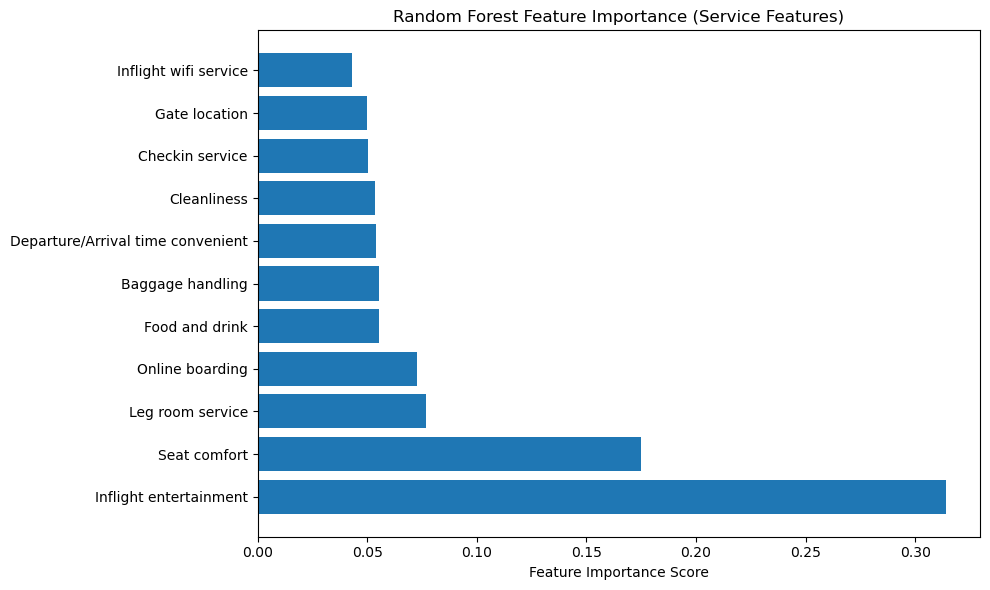

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importance (Service Features)")
plt.tight_layout()
plt.show()

We analyzed the drivers of satisfaction using three independent techniques:

- Correlation Analysis

- Satisfaction Gap Analysis

- Random Forest Feature Importance

__All three consistently identify the same top drivers:__

Inflight entertainment

Online boarding

Leg room service

Cleanliness

Seat comfort

This consistency strengthens our conclusion and shows that these features are statistically the strongest predictors of customer satisfaction.

## Why is a satisfied customer disloyal?
In the airline industry, customer satisfaction and loyalty are related but not the same. Not all satisfied customers become loyal repeat customers.

To answer why some satisfied customers are still disloyal, we must identify both:
* What differences exist in their experiences, service perceptions, and demographics.
* Which specific service features, experiences, or customer traits most strongly impact loyalty even when satisfaction is high.

#### Approach:
* Compare service and operational ratings between “satisfied and loyal” versus “satisfied but disloyal” customers.
* Segment by demographics (especially age) because research shows young customers may behave differently.
* Identify which service and experiential factors are rated lowest by disloyal, satisfied customers.

#### 1. Import the cleaned dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Load the cleaned dataset
df = pd.read_csv('Invistico_Airline_cleaned.csv')


In [22]:
# Sanitize column names (remove extra spaces)
df.columns = df.columns.str.strip()

# Print actual column names to verify
def list_columns(df):
    print('\n'.join(df.columns.tolist()))

print('Actual columns in your dataframe:')
list_columns(df)


Actual columns in your dataframe:
satisfaction
Gender
Age
Type of Travel
Class
Flight Distance
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
Departure Delay in Minutes
Arrival Delay in Minutes
Customer Type_loyal customer


#### 2. Define Service and Delay Columns
Create separate lists for service and delay features based on the columns present in the dataset. Service features include comfort, in-flight entertainment, food, and other touchpoints, while delay features measure the airline performance (arrival/departure delays)

**Why?:**  
This distinction allows us to independently analyze how different categories of experience—service quality (soft factors) and operations (hard factors) affect satisfaction and loyalty. By organizing them separately, we can effectively determine which type of experience is most influential among loyal and disloyal satisfied customers

In [23]:
# Define your service and delay columns

service_cols = [
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding'
]

delay_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Only use columns that actually exist in the dataframe
service_cols_actual = [col for col in service_cols if col in df.columns]
delay_cols_actual = [col for col in delay_cols if col in df.columns]

# Alert if any expected columns are missing
missing = [col for col in service_cols + delay_cols if col not in df.columns]
if missing:
    print(f"Missing columns (check for typos or spaces!): {missing}")
else:
    print("All service/delay columns found.")


All service/delay columns found.


#### 3. Segment Customers by Satisfaction and Loyalty Status
Define masks to separate 'satisfied and loyal' and 'satisfied but disloyal' customer groups.

**Why?:**

Segmentation by these two traits helps in targeted analysis within the population of interest, those who are satisfied. We can reveal what prevents some from becoming loyal, per behavioral segmentation and loyalty research.

In [24]:
# Create masks for satisfied, loyal, disloyal customers

mask_satisfied = df['satisfaction'] == 1  # adjust this if your coding is different
mask_disloyal = df['Customer Type_loyal customer'] == 0
mask_loyal = df['Customer Type_loyal customer'] == 1

satisfied_disloyal = df[mask_satisfied & mask_disloyal]
satisfied_loyal = df[mask_satisfied & mask_loyal]

print(f"Count of satisfied but disloyal: {len(satisfied_disloyal)}")
print(f"Count of satisfied and loyal: {len(satisfied_loyal)}")


Count of satisfied but disloyal: 5688
Count of satisfied and loyal: 65194


#### 4. Compare Mean Service and Delay Ratings (Group Comparison)
Calculate average ratings for every service/delay feature in both loyal and disloyal satisfied groups, then combine them for easy side-by-side comparison.

**Why?:**

Allows visual and quantitative identification of which features are rated lower by disloyal customers. The gaps indicate possible 'loyalty bottleneck' areas, reflecting key principles from the Importance-Performance Analysis framework in customer experience management

In [25]:
# Group comparison

agg_sd = satisfied_disloyal[service_cols_actual + delay_cols_actual].mean()
agg_sl = satisfied_loyal[service_cols_actual + delay_cols_actual].mean()
cat_compare = pd.DataFrame({'Disloyal': agg_sd, 'Loyal': agg_sl})

print("\nMean feature values (satisfied disloyal vs loyal):\n", cat_compare)



Mean feature values (satisfied disloyal vs loyal):
                                     Disloyal      Loyal
Seat comfort                        3.722925   3.095177
Departure/Arrival time convenient   2.725738   2.989769
Food and drink                      3.681962   2.951683
Gate location                       2.825422   2.988925
Inflight wifi service               3.116034   3.556738
Inflight entertainment              3.626231   4.058993
Online support                      3.024789   4.066693
Ease of Online booking              3.113221   4.061095
On-board service                    3.715014   3.885910
Leg room service                    3.386252   3.884575
Baggage handling                    4.104255   3.957511
Checkin service                     3.732771   3.638126
Cleanliness                         4.103551   3.966653
Online boarding                     3.085795   3.809906
Departure Delay in Minutes         12.674578  12.041599
Arrival Delay in Minutes           12.654184  12.23

#### 5. Analyze Age Distribution (Theory & Practice)
Calculate the mean and median age for both segments and group the ages into bands.

Plot a bar chart of customer proportions in each age group for loyal and disloyal segments.

**Why?:**

By examining age, we test this theory for our sample and spot generational patterns in disloyalty
Visuals clarifies which age ranges are among the disloyal, providing actionable business insight into which demographic segments require different strategies for fostering loyalty.

Mean age (Satisfied, Disloyal): 27.9
Median age (Satisfied, Disloyal): 24.0
Mean age (Satisfied, Loyal): 42.2
Median age (Satisfied, Loyal): 43.0

Age group distribution of satisfied, disloyal customers:
Age Group
Under 30    4289
30-44        903
45-60        417
60+           79
Name: count, dtype: int64


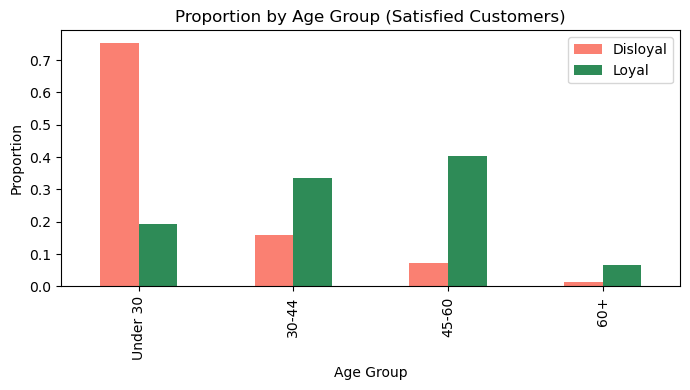

In [26]:
# Analyze age for satisfied but disloyal customers (and compare)
mean_age_disloyal = satisfied_disloyal['Age'].mean()
median_age_disloyal = satisfied_disloyal['Age'].median()
mean_age_loyal = satisfied_loyal['Age'].mean()
median_age_loyal = satisfied_loyal['Age'].median()

print(f"Mean age (Satisfied, Disloyal): {mean_age_disloyal:.1f}")
print(f"Median age (Satisfied, Disloyal): {median_age_disloyal:.1f}")
print(f"Mean age (Satisfied, Loyal): {mean_age_loyal:.1f}")
print(f"Median age (Satisfied, Loyal): {median_age_loyal:.1f}")

# Age group breakdown
bins = [0, 29, 44, 60, 120]
labels = ['Under 30', '30-44', '45-60', '60+']
satisfied_disloyal = satisfied_disloyal.copy()  # <-- FIX: create a copy
satisfied_disloyal['Age Group'] = pd.cut(satisfied_disloyal['Age'], bins=bins, labels=labels)
age_group_counts = satisfied_disloyal['Age Group'].value_counts().sort_index()
print("\nAge group distribution of satisfied, disloyal customers:")
print(age_group_counts)

# Optional: Visual - Stacked bar chart for presentation
satisfied_loyal = satisfied_loyal.copy()  # <-- FIX: create a copy
satisfied_loyal['Age Group'] = pd.cut(satisfied_loyal['Age'], bins=bins, labels=labels)
counts_disloyal = satisfied_disloyal['Age Group'].value_counts(normalize=True).sort_index()
counts_loyal = satisfied_loyal['Age Group'].value_counts(normalize=True).sort_index()
age_group_df = pd.DataFrame({'Disloyal': counts_disloyal, 'Loyal': counts_loyal})
age_group_df.plot(kind='bar', figsize=(7,4), color=['salmon','seagreen'])
plt.title('Proportion by Age Group (Satisfied Customers)')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


In the graph above satisfied customers under 30 are the most disloyal while other age groups are more loyal

#### 7. Focused Segment: Young, Satisfied, Disloyal Customers
Filter for young customers (e.g., under 30) who are satisfied but disloyal, for focused subgroup analysis.

**Why?:**

Analyzing this segment directly helps address generational gaps in airline loyalty

In [27]:
# Adjust age threshold as appropriate for your business (under 30, under 35 etc.)

young_mask = (df['Age'] < 30)  # or choose your own limit
segment = df[mask_satisfied & mask_disloyal & young_mask]

print(f"Count of young, satisfied, disloyal customers: {len(segment)}")


Count of young, satisfied, disloyal customers: 4289


#### 8. Feature Means in Young Disloyal Segment
Calculate and sort mean ratings for all service and delay features within the young, satisfied, disloyal segment to identify pain points.

**Why?:**

By focusing on this segment, we identify service elements that fail to convert satisfaction into loyalty among the rising generation of travelers. These highlight feature-specific action items for airlines improvement.

In [28]:
# For each service and delay column, calculate the mean rating

means = segment[service_cols_actual + delay_cols_actual].mean().sort_values()
print("\nMean ratings (young, satisfied, disloyal):\n", means)


Mean ratings (young, satisfied, disloyal):
 Departure/Arrival time convenient     2.381907
Gate location                         2.816974
Online support                        3.009559
Online boarding                       3.072744
Inflight wifi service                 3.100490
Ease of Online booking                3.101655
Leg room service                      3.363488
Inflight entertainment                3.509210
Food and drink                        3.580322
Seat comfort                          3.602938
On-board service                      3.705293
Checkin service                       3.739566
Baggage handling                      4.102122
Cleanliness                           4.105386
Arrival Delay in Minutes             12.186524
Departure Delay in Minutes           12.199114
dtype: float64


#### 9. Visualize Low-rated Services for Young, Disloyal Customers
Horizontal bar chart of means readings from above for service ratings of the young, satisfied, disloyal group, highlighting features below a business-critical threshold 4.

**Why?:**

Visualizations like this quickly reveal which touchpoints require urgent improvement in order to foster loyalty, a core tenet of the Service-Profit Chain for airlines.

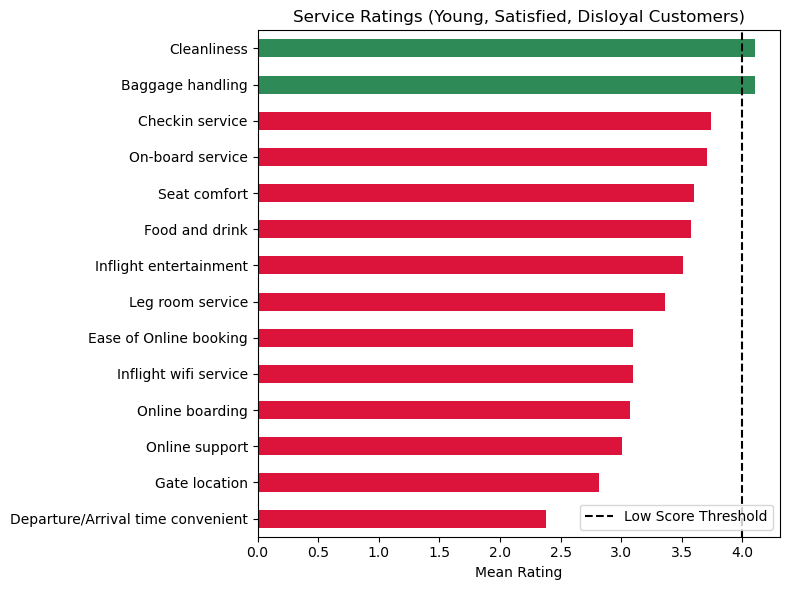

In [29]:
import matplotlib.pyplot as plt

# Only select service columns (not delays)
service_means = means[service_cols_actual]

# Sort for clearer presentation (optional)
service_means = service_means.sort_values()

# Color bars by threshold
colors = ["crimson" if v < 4 else "seagreen" for v in service_means]

plt.figure(figsize=(8,6))
ax = service_means.plot(kind='barh', color=colors)
plt.title('Service Ratings (Young, Satisfied, Disloyal Customers)')
plt.xlabel('Mean Rating')
plt.axvline(4, color='black', linestyle='--', label='Low Score Threshold')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Each bar in the graph above shows the average rating given by young satisfied customers for different services. The higher the bar, the more satisfied they were with that particular service. Anything in green is above our threshold of 4. Everything in red is below that line

#### 10. Group Comparison Plots for All Satisfied Customers
Plot bar charts comparing the mean ratings of service and delay features for both loyal and disloyal satisfied customers of all ages.

**Why?:**

This broader view spots improvement opportunities that benefit the entire passenger base, not just certain segments. Including all ages ensures investments in customer experience support company-wide retention and makes all customers feel valued. Visual comparisons help quickly reveal where satisfaction fails to produce loyalty, focusing improvement efforts for the greatest overall impact.

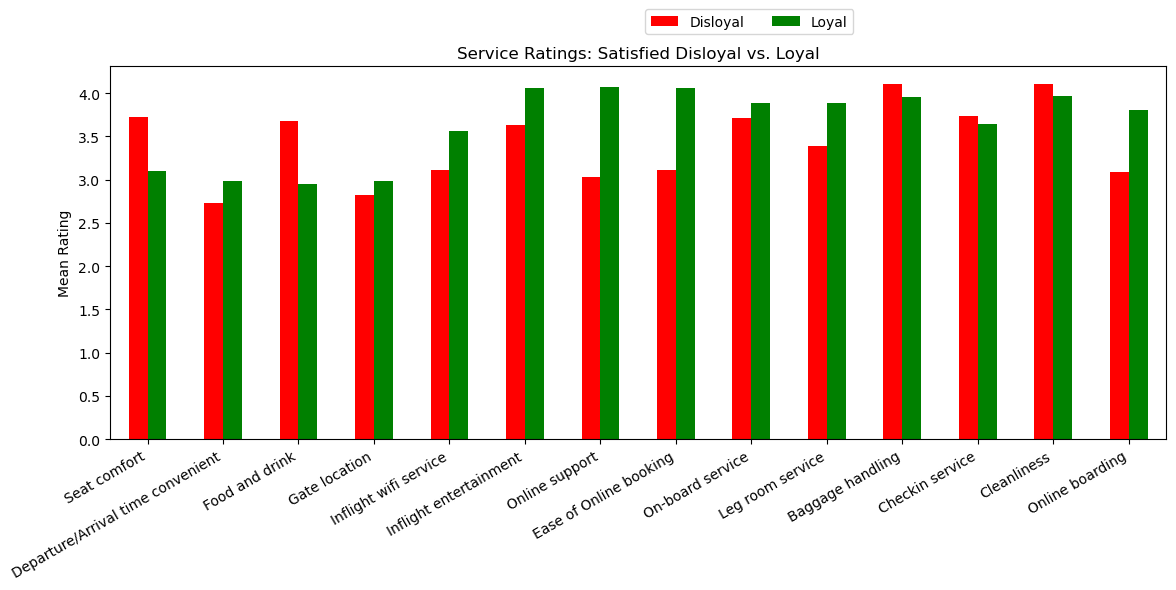

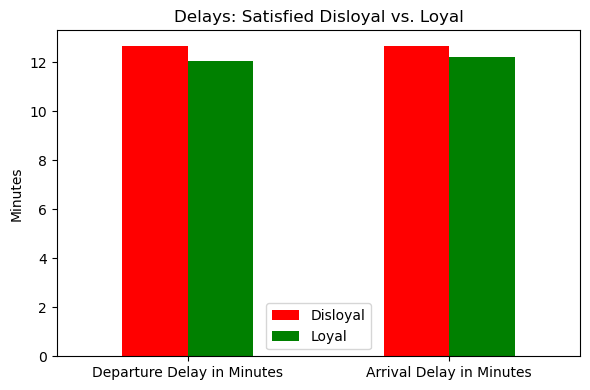

In [30]:
# Visualize differences - only for available columns

if service_cols_actual:
    plt.figure(figsize=(12, 6))
    cat_compare.loc[service_cols_actual].plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
    plt.title('Service Ratings: Satisfied Disloyal vs. Loyal')
    plt.ylabel('Mean Rating')
    plt.xticks(rotation=30, ha='right')  # Rotate 30° and align right
    plt.tight_layout(rect=[0, 0.06, 1, 1])  # Extra bottom margin
    plt.legend(loc='center left', bbox_to_anchor=(0.5, 1.12), ncol=2)
    plt.show()
else:
    print('No service columns found for visualization.')

if delay_cols_actual:
    plt.figure(figsize=(6, 4))
    cat_compare.loc[delay_cols_actual].plot(kind='bar', ax=plt.gca(), color=['red', 'green'])
    plt.title('Delays: Satisfied Disloyal vs. Loyal')
    plt.ylabel('Minutes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print('No delay columns found for visualization.')


Above graphs are ratings of all ages towards service and performance:

First chart is the service ratings of loyal and disloyal customers who are satisfied.
Second chart is the performance ratings of loyal and disloyal customers who are satisfied.

### PREDICTION

In [31]:
cluster_cols = [
    "Seat comfort",
    "Departure/Arrival time convenient",
    "Food and drink",
    "Gate location",
    "Inflight wifi service",
    "Inflight entertainment",
    "Online support",
    "Ease of Online booking",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Cleanliness",
    "Online boarding",
    "Flight Distance",
    "Customer Type_loyal customer",
]


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [33]:
q1 = df.copy()    # SAFE COPY


X_cluster = q1[cluster_cols]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


q1["cluster"] = clusters


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


In [34]:
cluster_profile = q1.groupby("cluster")[cluster_cols].mean().round(2)
cluster_profile

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Flight Distance,Customer Type_loyal customer
cluster,,,,,,,,,,,,,,,,
0,2.39,2.91,2.69,2.99,2.25,2.60,2.38,2.09,2.72,2.86,3.09,2.85,3.10,2.18,2018.66,0.72
1,4.02,3.97,3.96,3.81,3.70,4.12,4.09,4.17,3.92,3.89,4.07,3.63,4.07,3.90,1941.37,0.90
2,1.91,1.88,1.68,1.98,3.86,3.40,4.16,4.24,3.79,3.73,3.95,3.56,3.97,4.05,1985.50,0.82


__Cluster Interpretation__
 Cluster 1 — “High Satisfaction, High Engagement Travelers”

(Highest scores across nearly all service categories)

Best ratings in: Wi-Fi, Entertainment, Online Support, Check-in, Cleanliness

Extremely strong service engagement — they rate everything well

High proportion of loyal customers (0.90)

More likely to belong to higher service classes (lower Eco proportion)

Slightly shorter flight distances

Interpretation:
These passengers are very satisfied, tend to be loyalty members, and respond positively across all service touchpoints. They likely have higher expectations but also receive better service or choose premium options.

__Cluster 2 — “Moderately Satisfied, High-Expectation Travelers”__

(Scores in the middle range, balanced but not overly positive)

Mid-level scores in: Entertainment, Comfort, Online Booking

Lower leg-room and check-in satisfaction

Loyal customers are common (0.83)

Higher Eco-class representation

Shorter flights compared to Cluster 0

Interpretation:
This group is somewhat satisfied but not enthusiastic. They value comfort and service, but certain aspects—like leg room, baggage handling, and check-in—drag their satisfaction down. They might have higher expectations or inconsistent experience.

__Cluster 0 — “Unsatisfied / Service-Critical Passengers"__

(Lowest ratings across almost every service feature)

Low scores in: Entertainment, Wi-Fi, Online Support, Food, Boarding

Weak ratings in comfort (Seat comfort = 2.43)

Higher flight distances (longer flights tend to expose more frustrations)

Lower loyal customer ratio (0.60)

Heavily eco-class travelers (0.69)

Interpretation:
This is the definitely unsatisfied cluster. They consistently give low ratings across most service dimensions. They represent long-haul, economy-heavy passengers with lower loyalty rates, meaning this group feels the most neglected or underserved.

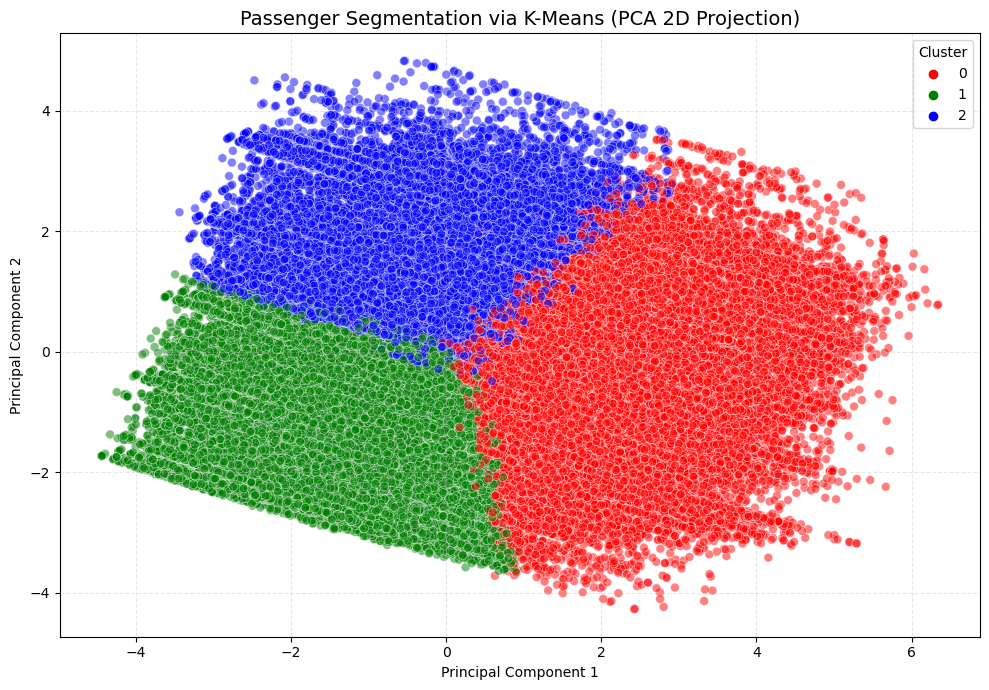

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Run PCA on your scaled data (X_scaled)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

q1["PC1"] = pca_components[:, 0]
q1["PC2"] = pca_components[:, 1]

# 2. Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=q1,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette=["red", "green", "blue"],
    alpha=0.5,
    s=40
)

plt.title("Passenger Segmentation via K-Means (PCA 2D Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


This PCA plot shows how passengers naturally group into three behavior segments:

Cluster 1 (Green): Clearly separated on the right — these are the highly satisfied travelers with consistently strong ratings.

Cluster 2 (Blue): Sits in the middle — the moderately satisfied group with mixed experiences.

Cluster 0 (Red): Spread widely on the left — the dissatisfied passengers with low and inconsistent service ratings.

The separation shows that passengers do form distinct satisfaction-based groups, and the airline can target each group differently.

***1. From business point of view, the primary focus would be to address the pain poits of loyal customers, inorder not to loose the existing business***

The below analysis and visualization enables management to quickly prioritize targeted enhancements for the features with the greatest negative impact on satisfaction for loyal customers.


Lowest rated features for loyal customers:
Seat comfort      2.866960
Food and drink    2.885443
Gate location     2.990584
dtype: float64


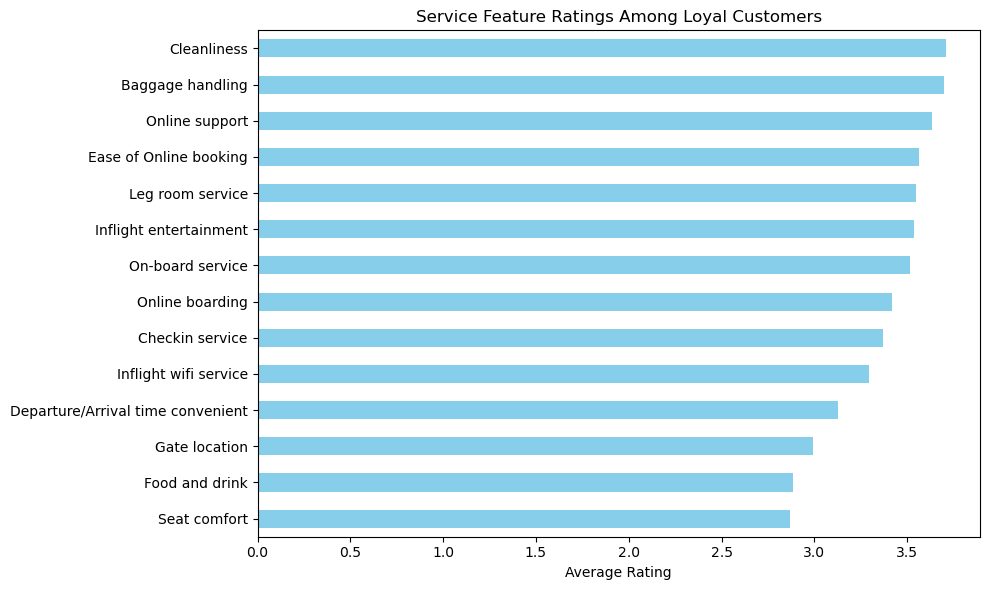

In [36]:
import matplotlib.pyplot as plt

# Mask for loyal customers
mask_loyal_c = df['Customer Type_loyal customer'] == 1

# Service columns to analyze
service_columns = [
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding'
]

# Calculate mean ratings for loyal customers
loyal_means = df.loc[mask_loyal_c, service_columns].mean().sort_values()

# Display the 3 lowest rated features
print("Lowest rated features for loyal customers:")
print(loyal_means.head(3))

# If you want a bar chart of all features for loyal customers:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
loyal_means.plot(kind='barh', color='skyblue')
plt.title('Service Feature Ratings Among Loyal Customers')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()


**Key outputs**

Even loyal customers express notable dissatisfaction with certain aspects, especially seat comfort, food quality, and gate placement.

Continual focus on these low-scoring services will be essential to maintain and grow loyalty, which helps to avoid the negative business impact.


***2.Apart from the average values, there should be emphasis on the services which are rated extremely low(0 or 1) by large portions of loyal customers***

Addressing areas with high proportions of negative feedback supports efforts to create a more customer-centric brand.

Doing so can turn loyal customers into brand advocates, driving organic growth through word-of-mouth.


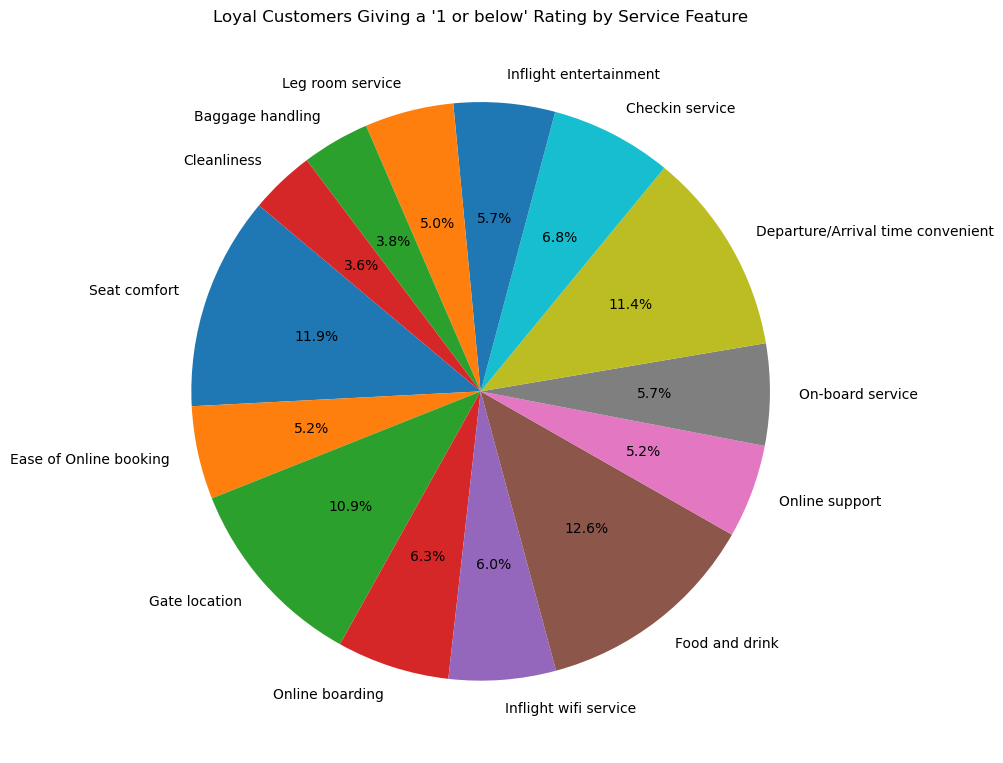

In [37]:
import matplotlib.pyplot as plt

# Filter for loyal customers
mask_loyal_c = df['Customer Type_loyal customer'] == 1
loyal_df = df.loc[mask_loyal_c]

service_columns = [
    'Seat comfort',
    'Ease of Online booking',
    'Gate location',
    'Online boarding',
    'Inflight wifi service',
    'Food and drink',
    'Online support',
    'On-board service',
    'Departure/Arrival time convenient',
    'Checkin service',
    'Inflight entertainment',
    'Leg room service',
    'Baggage handling',
    'Cleanliness'
]

# Calculate the percentage of loyal customers who rated "1 or below" for each feature
percentages = []
for col in service_columns:
    pct = (loyal_df[col] <= 1).sum() / len(loyal_df) * 100
    percentages.append(pct)

# Create pie chart with percentage labels
plt.figure(figsize=(10, 10))
plt.pie(
    percentages,
    labels=service_columns,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Loyal Customers Giving a '1 or below' Rating by Service Feature")
plt.tight_layout()
plt.show()


**Key Outputs**

Improving seat comfort, enhancing the ease of online booking, and optimizing gate processes should be urgent priorities to both retain loyal customers and encourage repeat business.

Visualizing dissatisfaction as percentages helps communicate urgency and guides more effective resource allocation.

***3. As the next plan of action, the management's focus should be to increase the business and turn the disloyal customers to loyal***

Because these ratings come explicitly from disloyal customers, consistently underperforming in these areas likely means your competitors are outperforming you, driving your most dissatisfied customers away.


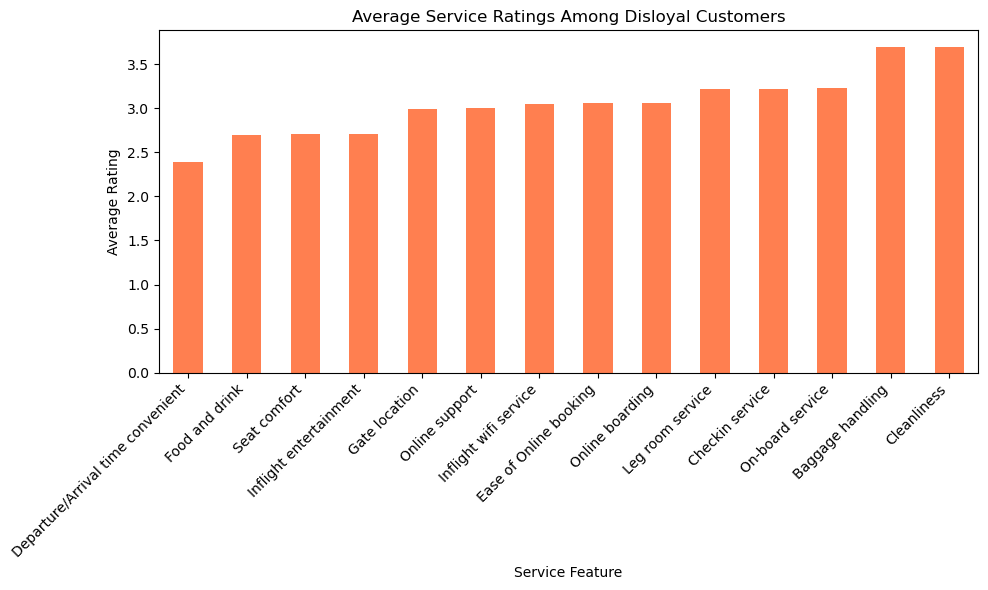

In [38]:

# Mask for disloyal customers
mask_disloyal_c = df['Customer Type_loyal customer'] == 0
disloyal_df = df.loc[mask_disloyal_c]

# List of service columns
service_columns = [
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Gate location',
    'Inflight wifi service',
    'Inflight entertainment',
    'Online support',
    'Ease of Online booking',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Cleanliness',
    'Online boarding'
]

# Calculate and sort averages
means = disloyal_df[service_columns].mean().sort_values()

# Vertical bar chart
plt.figure(figsize=(10, 6))
means.plot(kind='bar', color='coral')
plt.title('Average Service Ratings Among Disloyal Customers')
plt.ylabel('Average Rating')
plt.xlabel('Service Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Key Outputs**

The lowest bars on this chart—representing features like seat comfort, departure/arrival time convenience, food and drink, and inflight entertainment—indicate the main organizational weaknesses driving disloyalty.

Persistently low scores here reflect systemic problems eroding brand trust and satisfaction.

**4. Understanding which features consistently drive “very low” ratings among defected customers highlights the airline’s most vulnerable areas**

By focusing on these specific issues, the airline can proactively design initiatives and investments to win back lost customers and prevent future departures.

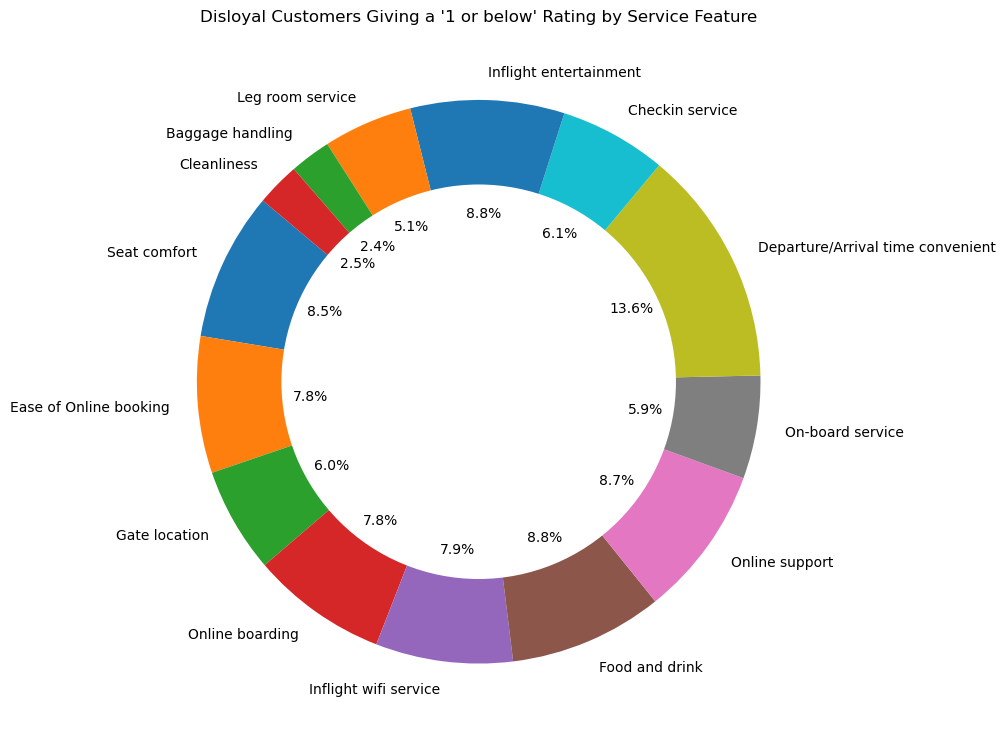

In [39]:

# Filter for disloyal customers
mask_disloyal_c = df['Customer Type_loyal customer'] == 0
disloyal_df = df.loc[mask_disloyal_c]

service_columns = [
    'Seat comfort',
    'Ease of Online booking',
    'Gate location',
    'Online boarding',
    'Inflight wifi service',
    'Food and drink',
    'Online support',
    'On-board service',
    'Departure/Arrival time convenient',
    'Checkin service',
    'Inflight entertainment',
    'Leg room service',
    'Baggage handling',
    'Cleanliness'
]

# Calculate the percentage rating 1 or below for each feature
percentages = []
for col in service_columns:
    pct = (disloyal_df[col] <= 1).sum() / len(disloyal_df) * 100
    percentages.append(pct)

# Create donut chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    percentages,
    labels=service_columns,
    autopct='%1.1f%%',
    startangle=140
)
# Draw center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Disloyal Customers Giving a '1 or below' Rating by Service Feature")
plt.tight_layout()
plt.show()


**Key Outputs:**

The largest segments in this donut chart identify the service pain points causing the greatest dissatisfaction among disloyal customers.

Seat comfort, online booking, and gate location are particularly prominent, revealing where improvements are urgently needed to stop customer attrition.

Outperforming competitors in historically weak areas (like seat comfort or online processes) gives the airline a compelling message to disloyal customers: genuine change is happening, and their feedback matters to the business.

# Amie

**Figure out the reason why few customers are not satisfied with the service**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("Invistico_Airline_cleaned.csv")
print("Shape:", df.shape)
print(df.head(3))

print("\nSatisfaction distribution:")
print(df['satisfaction'].value_counts())

print("\nSatisfaction distribution (percentage):")
print(df['satisfaction'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')




Shape: (129487, 23)
   satisfaction  Gender  Age   Type of Travel     Class  Flight Distance  \
0             1  female   65  personal travel       eco              265   
1             1    male   47  personal travel  business             2464   
2             1  female   15  personal travel       eco             2138   

   Seat comfort  Departure/Arrival time convenient  Food and drink  \
0             0                                  0               0   
1             0                                  0               0   
2             0                                  0               0   

   Gate location  ...  Ease of Online booking  On-board service  \
0              2  ...                       3                 3   
1              3  ...                       3                 4   
2              3  ...                       2                 3   

   Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                 0                 3                5

**Analyze Dissatisfied Customers’ Lowest-Rated Features**

To understand why customers become dissatisfied, we isolate the subset of passengers who rated the airline as dissatisfied and examine the average values of all numeric service features, such as comfort, delays, digital experience, and onboard services.

We then sort these variables and plot the lowest-scoring features, which represent the areas where dissatisfied customers give the poorest ratings.


Average numeric feature values (dissatisfied only):
satisfaction                    0.000000
Customer Type_loyal customer    0.692415
Seat comfort                    2.467315
Inflight entertainment          2.609044
Food and drink                  2.660609
Ease of Online booking          2.851873
Online boarding                 2.869653
Inflight wifi service           2.919922
Online support                  2.959833
Checkin service                 2.971845
dtype: float64


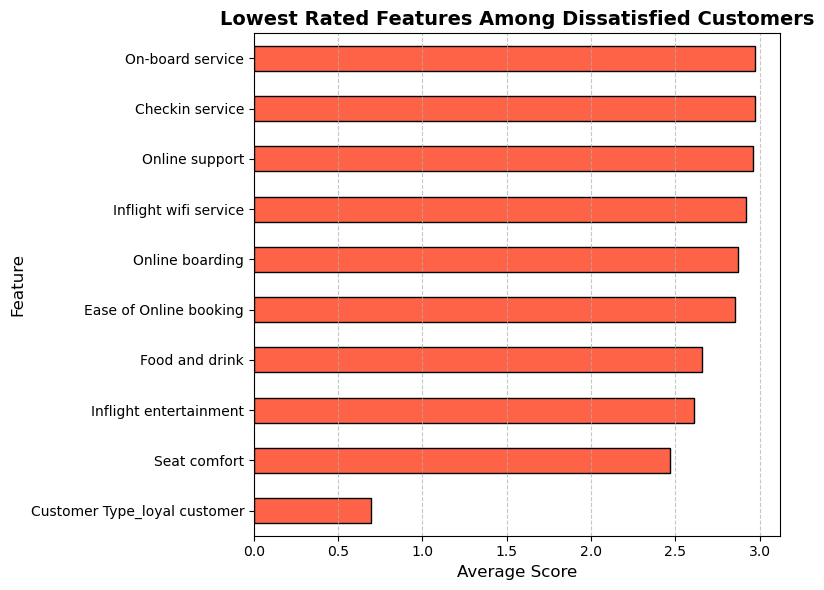

In [41]:

dissatisfied = df[df['satisfaction'] == 0]

dissatisfied_summary = dissatisfied.select_dtypes(include='number').mean().sort_values()

print("\nAverage numeric feature values (dissatisfied only):")
print(dissatisfied_summary.head(10))

dissatisfied_summary = dissatisfied_summary.drop(labels='satisfaction', errors='ignore')

plt.figure(figsize=(8, 6))
dissatisfied_summary.head(10).plot(kind='barh', color='tomato', edgecolor='black')

plt.title("Lowest Rated Features Among Dissatisfied Customers", fontsize=14, weight='bold')
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Analyze Correlated Pain Points Among Dissatisfied Customers**

To understand why customers are dissatisfied, it’s not enough to look at average scores alone. Problems often occur in clusters, not in isolation. Correlation analysis reveals which service areas tend to fail together.


Top correlated feature pairs among dissatisfied customers:
Age                       Age                           1.000000
Arrival Delay in Minutes  Departure Delay in Minutes    0.968787
Ease of Online booking    Online boarding               0.813679
Inflight wifi service     Online boarding               0.781793
                          Ease of Online booking        0.773787
Online support            Online boarding               0.718065
Seat comfort              Inflight entertainment        0.675065
Inflight wifi service     Online support                0.666570
Ease of Online booking    Online support                0.658900
Baggage handling          Cleanliness                   0.588232
dtype: float64


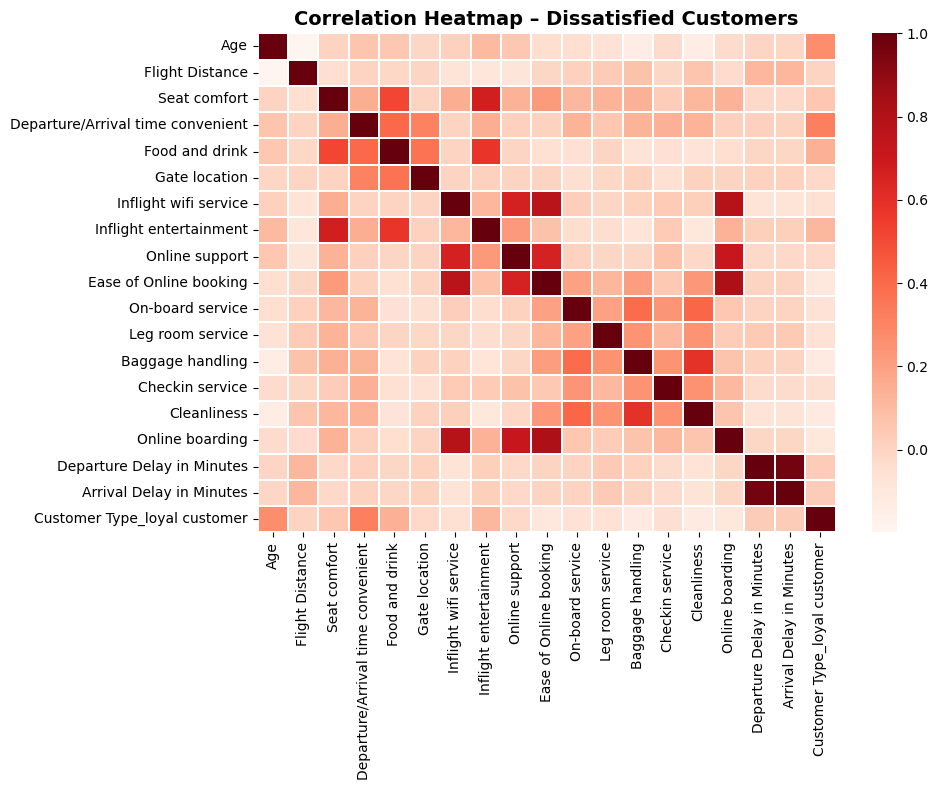

In [42]:


dissatisfied = df[df['satisfaction'] == 0]

corr_dissat = dissatisfied.select_dtypes(include='number').drop(columns='satisfaction', errors='ignore').corr()

print("\nTop correlated feature pairs among dissatisfied customers:")
print(corr_dissat.unstack().sort_values(ascending=False).drop_duplicates().head(10))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_dissat, cmap='Reds', annot=False, linewidths=0.3)
plt.title("Correlation Heatmap – Dissatisfied Customers", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()



**Analyze Delay Relationship Among Dissatisfied Passengers**

Delays are one of the strongest predictors of dissatisfaction in air travel.
To understand how delays contribute to negative experiences, we examine whether departure delays and arrival delays move together.

**Analyze Delay Relationship Among Dissatisfied Passengers**

Delays are widely recognized as a major trigger of customer dissatisfaction in aviation.
To understand how delays shape negative passenger experience, we analyze whether
departure delays and arrival delays rise together or behave independently.


Optimization terminated successfully.
         Current function value: 0.573128
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        dissatisfaction   No. Observations:               129487
Model:                          Logit   Df Residuals:                   129480
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Dec 2025   Pseudo R-squ.:                  0.1677
Time:                        03:57:55   Log-Likelihood:                -74213.
converged:                       True   LL-Null:                       -89171.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          4.3440      0.034    128.372      0.000      

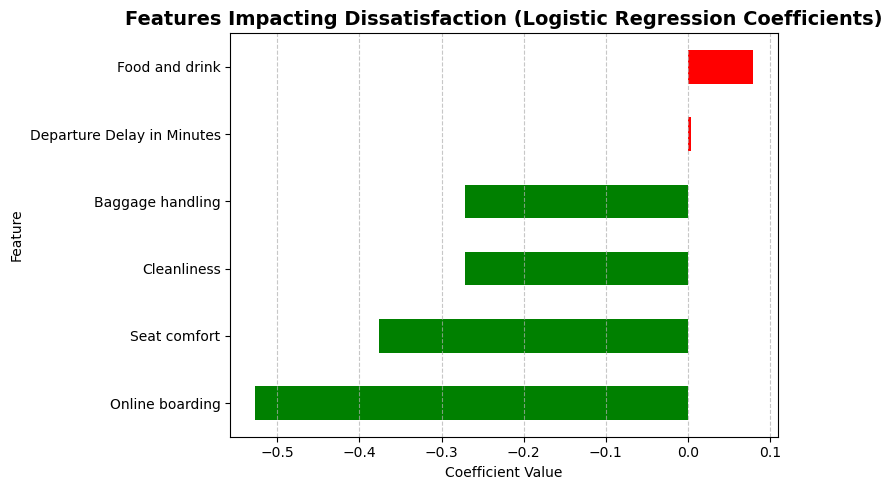

In [43]:
df['dissatisfaction'] = 1 - df['satisfaction']

cols = ['Seat comfort','Food and drink','Baggage handling',
        'Cleanliness','Online boarding','Departure Delay in Minutes']

X = df[cols]
X = sm.add_constant(X)
y = df['dissatisfaction']

model = sm.Logit(y, X).fit()
print(model.summary())

coefs = model.params.drop('const')

coefs_sorted = coefs.sort_values()

plt.figure(figsize=(8, 5))
coefs_sorted.plot(kind='barh', color=['red' if c > 0 else 'green' for c in coefs_sorted])

plt.title("Features Impacting Dissatisfaction (Logistic Regression Coefficients)", fontsize=14, weight='bold')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




**Analyze Who Is Dissatisfied: Travel Class & Purpose**

Understanding *who* is dissatisfied is just as important as understanding *why*.
By examining dissatisfaction across travel class and travel purpose, we uncover which
customer groups have the most unmet expectations.


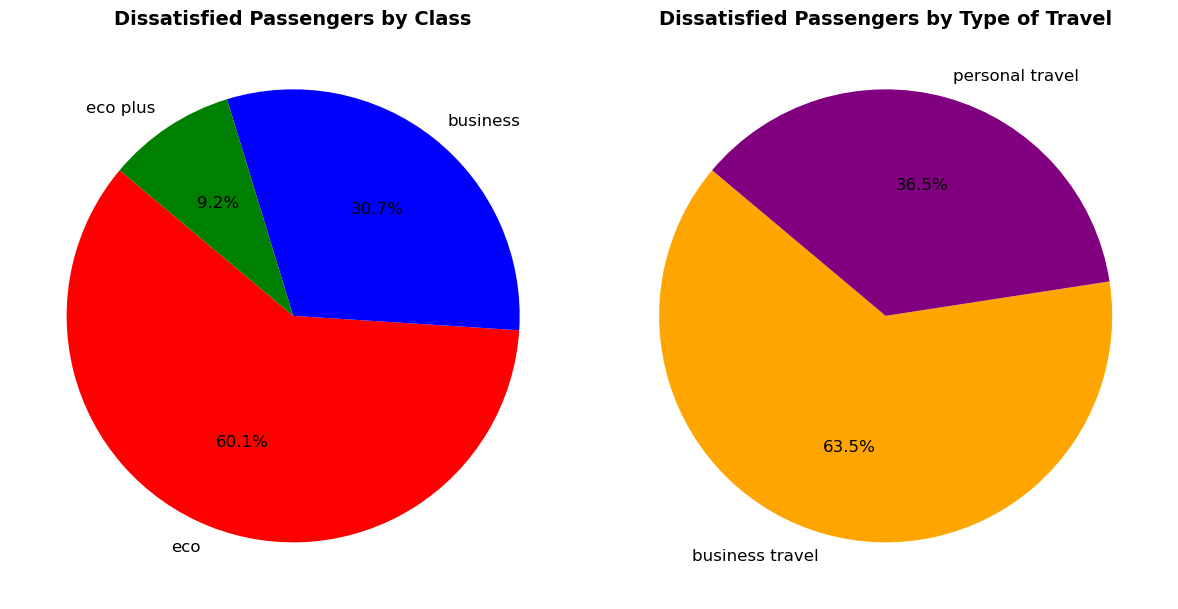

In [44]:
dissatisfied = df[df['satisfaction'] == 0].copy()

# The 'Class' column was not one-hot encoded, so we can use it directly.
# The get_original_class function and its application are not needed.
# If the original 'Class' column was somehow dropped, one might re-merge it or re-create it based on previous steps.
# However, based on the previous notebook state, 'Class' still exists as a categorical column.

class_prop = dissatisfied['Class'].value_counts(normalize=True)

type_prop = dissatisfied['Type of Travel'].value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(class_prop, labels=class_prop.index, autopct='%1.1f%%',
            startangle=140, colors=['red','blue','green'], textprops={'fontsize':12})
axes[0].set_title("Dissatisfied Passengers by Class", fontsize=14, weight='bold')

axes[1].pie(type_prop, labels=type_prop.index, autopct='%1.1f%%',
            startangle=140, colors=['orange','purple'], textprops={'fontsize':12})
axes[1].set_title("Dissatisfied Passengers by Type of Travel", fontsize=14, weight='bold')

plt.tight_layout()
plt.show()